# Plant Phenotyping Datasets

https://www.plant-phenotyping.org/datasets-download

mutant classification

In [1]:
import os, glob, csv
import numpy as np
from skimage.io import imread
from skimage.transform import resize

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
meta_path = "data/Ara2013-Canon/Metadata.csv"

images = []
genotype = []

with open(meta_path,"r") as f:
    reader = csv.reader(f)
    for row in reader:
        base = imread("data/Ara2013-Canon/"+row[0]+"_rgb.png")
        #pad with black to make it square
        size = np.max((base.shape[0],base.shape[1]))
        image = np.zeros((size,size,3),dtype=np.uint8)
        image[0:base.shape[0],0:base.shape[1]]=base
        image = resize(image,(224,224))
        images.append(image)
        genotype.append(row[1].strip())
images = np.array(images)
genotype= np.array(genotype)

/home/dl-box/anaconda3/envs/keras/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


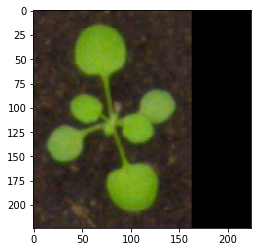

In [3]:
plt.imshow(images[1])

In [4]:
#inspect how many genotype and images per genotype
np.unique(genotype,return_counts=True)

(array(['Col-0', 'adh1', 'ctr', 'ein2', 'pgm'], dtype='<U5'),
 array([34, 25, 32, 39, 35]))

In [5]:
d = [x for x in zip(['Col-0', 'adh1', 'ctr', 'ein2', 'pgm'],[0,1,2,3,4])]
print(d)
print(genotype)

for i in range(len(genotype)):
    for a,b in d:
        genotype[i] = genotype[i].replace(a,str(b))
print(genotype)

[('Col-0', 0), ('adh1', 1), ('ctr', 2), ('ein2', 3), ('pgm', 4)]
['ein2' 'ein2' 'ctr' 'Col-0' 'pgm' 'ein2' 'ctr' 'ein2' 'ctr' 'ctr' 'adh1'
 'ein2' 'pgm' 'ein2' 'ctr' 'Col-0' 'ctr' 'adh1' 'ein2' 'ctr' 'Col-0' 'pgm'
 'Col-0' 'ein2' 'ctr' 'adh1' 'pgm' 'ein2' 'ctr' 'pgm' 'Col-0' 'ein2' 'ctr'
 'adh1' 'ein2' 'pgm' 'ctr' 'pgm' 'Col-0' 'ctr' 'pgm' 'ein2' 'Col-0' 'pgm'
 'Col-0' 'ein2' 'ctr' 'adh1' 'ein2' 'pgm' 'ein2' 'Col-0' 'pgm' 'ein2'
 'adh1' 'pgm' 'ein2' 'ctr' 'Col-0' 'pgm' 'Col-0' 'ctr' 'pgm' 'ein2' 'ctr'
 'Col-0' 'pgm' 'Col-0' 'ein2' 'ctr' 'adh1' 'ein2' 'pgm' 'ein2' 'Col-0'
 'pgm' 'Col-0' 'ctr' 'ein2' 'pgm' 'ein2' 'ctr' 'Col-0' 'pgm' 'Col-0'
 'adh1' 'ein2' 'ein2' 'pgm' 'ctr' 'Col-0' 'pgm' 'Col-0' 'ctr' 'adh1'
 'ein2' 'ein2' 'ctr' 'Col-0' 'pgm' 'Col-0' 'ctr' 'adh1' 'ein2' 'pgm'
 'ein2' 'Col-0' 'pgm' 'ein2' 'ctr' 'adh1' 'ein2' 'pgm' 'ein2' 'Col-0'
 'pgm' 'Col-0' 'ein2' 'ctr' 'adh1' 'ein2' 'pgm' 'ein2' 'ctr' 'pgm' 'Col-0'
 'ctr' 'adh1' 'adh1' 'ein2' 'adh1' 'Col-0' 'ctr' 'Col-0' 'pgm' 'adh1'


In [6]:
from keras.utils import to_categorical
_labels = np.array(genotype,dtype=np.uint8)
labels = to_categorical(_labels)
print(labels.shape)
print(labels)

/home/dl-box/anaconda3/envs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(165, 5)
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(images,labels,test_size=0.2)
print(X_train.shape,y_train.shape)

(132, 224, 224, 3) (132, 5)


In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True)
valid_datagen = ImageDataGenerator()

In [9]:
from keras import layers
from keras.models import Sequential
import keras.backend as K
K.clear_session()
model = Sequential()
model.add(layers.Conv2D(16,(3,3),
                        activation="relu",
                        input_shape=(224,224,3)))
model.add(layers.MaxPool2D(3,3))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.MaxPool2D(3,3))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPool2D(3,3))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPool2D(3,3))
model.add(layers.Dropout(0.2))
model.add(layers.GlobalAvgPool2D())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["acc"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
__________

In [ ]:
import keras
best = keras.callbacks.ModelCheckpoint("best_genotype_classification.hdf5",verbose=1)

history = model.fit_generator(train_datagen.flow(X_train,y_train,batch_size=16),
                    samples_per_epoch=X_train.shape[0],
                    validation_data=valid_datagen.flow(X_valid,y_valid),
                   epochs=1000,callbacks=[best])

/home/dl-box/anaconda3/envs/keras/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=<keras_pre..., epochs=1000, steps_per_epoch=8)`


Epoch 1/1000
8/8 [==============================] - 4s 512ms/step - loss: 1.6202 - acc: 0.1976 - val_loss: 1.6050 - val_acc: 0.1818

Epoch 00001: saving model to best_genotype_classification.hdf5
Epoch 2/1000
8/8 [==============================] - 0s 23ms/step - loss: 1.5823 - acc: 0.2579 - val_loss: 1.6081 - val_acc: 0.1818

Epoch 00002: saving model to best_genotype_classification.hdf5
Epoch 3/1000
8/8 [==============================] - 0s 17ms/step - loss: 1.5886 - acc: 0.2421 - val_loss: 1.6073 - val_acc: 0.1818

Epoch 00003: saving model to best_genotype_classification.hdf5
Epoch 4/1000
8/8 [==============================] - 0s 18ms/step - loss: 1.6031 - acc: 0.1976 - val_loss: 1.5961 - val_acc: 0.1818

Epoch 00004: saving model to best_genotype_classification.hdf5
Epoch 5/1000
8/8 [==============================] - 0s 17ms/step - loss: 1.5696 - acc: 0.2500 - val_loss: 1.5844 - val_acc: 0.1818

Epoch 00005: saving model to best_genotype_classification.hdf5
Epoch 6/1000
8/8 [======

Epoch 43/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.7019 - acc: 0.7392 - val_loss: 1.0012 - val_acc: 0.4848

Epoch 00043: saving model to best_genotype_classification.hdf5
Epoch 44/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.6978 - acc: 0.7421 - val_loss: 2.0489 - val_acc: 0.2121

Epoch 00044: saving model to best_genotype_classification.hdf5
Epoch 45/1000
8/8 [==============================] - 0s 19ms/step - loss: 0.8348 - acc: 0.6185 - val_loss: 0.8518 - val_acc: 0.6061

Epoch 00045: saving model to best_genotype_classification.hdf5
Epoch 46/1000
8/8 [==============================] - 0s 19ms/step - loss: 0.7613 - acc: 0.6710 - val_loss: 0.7954 - val_acc: 0.6364

Epoch 00046: saving model to best_genotype_classification.hdf5
Epoch 47/1000
8/8 [==============================] - 0s 18ms/step - loss: 0.7299 - acc: 0.6839 - val_loss: 0.7731 - val_acc: 0.6667

Epoch 00047: saving model to best_genotype_classification.hdf5
Epoch 48/1000
8/8 [=

8/8 [==============================] - 0s 19ms/step - loss: 0.5429 - acc: 0.8053 - val_loss: 1.7615 - val_acc: 0.3333

Epoch 00085: saving model to best_genotype_classification.hdf5
Epoch 86/1000
8/8 [==============================] - 0s 30ms/step - loss: 0.6505 - acc: 0.7924 - val_loss: 2.2146 - val_acc: 0.2424

Epoch 00086: saving model to best_genotype_classification.hdf5
Epoch 87/1000
8/8 [==============================] - 0s 27ms/step - loss: 0.7575 - acc: 0.6868 - val_loss: 0.6885 - val_acc: 0.6667

Epoch 00087: saving model to best_genotype_classification.hdf5
Epoch 88/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.6863 - acc: 0.7031 - val_loss: 1.0238 - val_acc: 0.5152

Epoch 00088: saving model to best_genotype_classification.hdf5
Epoch 89/1000
8/8 [==============================] - 0s 30ms/step - loss: 0.5686 - acc: 0.7608 - val_loss: 1.8765 - val_acc: 0.1818

Epoch 00089: saving model to best_genotype_classification.hdf5
Epoch 90/1000
8/8 [===============

Epoch 127/1000
8/8 [==============================] - 0s 22ms/step - loss: 0.3447 - acc: 0.8359 - val_loss: 0.7469 - val_acc: 0.6364

Epoch 00127: saving model to best_genotype_classification.hdf5
Epoch 128/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.3505 - acc: 0.8578 - val_loss: 0.7919 - val_acc: 0.6364

Epoch 00128: saving model to best_genotype_classification.hdf5
Epoch 129/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.2781 - acc: 0.8510 - val_loss: 0.8019 - val_acc: 0.6364

Epoch 00129: saving model to best_genotype_classification.hdf5
Epoch 130/1000
8/8 [==============================] - 0s 27ms/step - loss: 0.2225 - acc: 0.9141 - val_loss: 1.1996 - val_acc: 0.3636

Epoch 00130: saving model to best_genotype_classification.hdf5
Epoch 131/1000
8/8 [==============================] - 0s 18ms/step - loss: 0.2079 - acc: 0.9199 - val_loss: 0.7171 - val_acc: 0.6970

Epoch 00131: saving model to best_genotype_classification.hdf5
Epoch 132/1000


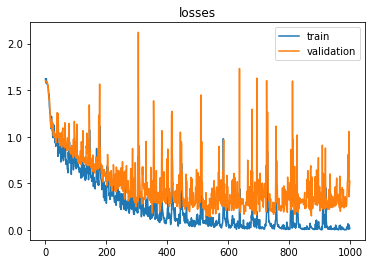

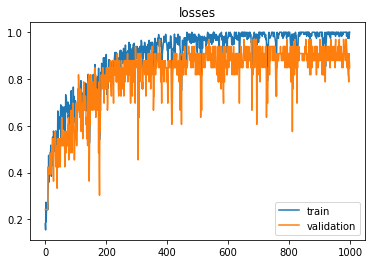

In [117]:
plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.legend()
plt.title("losses")
plt.show()

plt.plot(history.history['acc'],label="train")
plt.plot(history.history['val_acc'],label="validation")
plt.legend()
plt.title("losses")
plt.show()

In [118]:
model.load_weights("best_genotype_classification.hdf5")

In [120]:
model.metrics_names

['loss', 'acc']

In [122]:
print(model.evaluate(X_train,y_train))
print(model.evaluate(X_valid,y_valid))

132/132 [==============================] - 0s 1ms/step
[0.012926916591823101, 0.9924242424242424]
33/33 [==============================] - 0s 1ms/step
[0.5227972921548467, 0.8484848484848485]


[1] 4


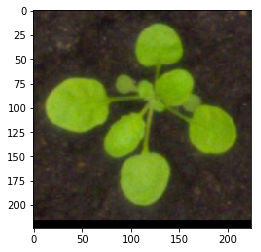

In [142]:
plt.imshow(X_valid[11])
print(np.argmax(model.predict(X_valid[11:12]),axis=1),np.argmax(y_train[11]))

In [156]:
from kwb.utils import grad_cam,build_guided_model,guided_backprop
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        36928     
__________

In [144]:
gc = grad_cam(model,X_valid[11],"max_pooling2d_3")

/home/dl-box/anaconda3/envs/keras/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


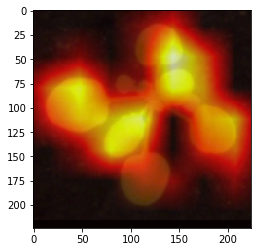

In [152]:
plt.imshow(X_valid[11])
plt.imshow(gc,alpha=0.7,cmap="hot")

In [154]:
gmodel=build_guided_model(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        36928     
__________

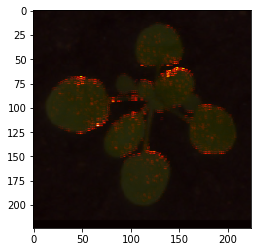

In [200]:
gb = guided_backprop(gmodel,X_valid[11],"dense_3",normalize="abs")
plt.imshow(X_valid[11])
plt.imshow(gb,cmap="hot",alpha=0.8)

In [166]:
import skimage
from skimage.exposure import rescale_intensity

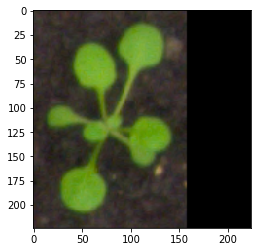

In [201]:
plt.imshow(X_train[0])

In [203]:
genotype

array(['3', '3', '2', '0', '4', '3', '2', '3', '2', '2', '1', '3', '4',
       '3', '2', '0', '2', '1', '3', '2', '0', '4', '0', '3', '2', '1',
       '4', '3', '2', '4', '0', '3', '2', '1', '3', '4', '2', '4', '0',
       '2', '4', '3', '0', '4', '0', '3', '2', '1', '3', '4', '3', '0',
       '4', '3', '1', '4', '3', '2', '0', '4', '0', '2', '4', '3', '2',
       '0', '4', '0', '3', '2', '1', '3', '4', '3', '0', '4', '0', '2',
       '3', '4', '3', '2', '0', '4', '0', '1', '3', '3', '4', '2', '0',
       '4', '0', '2', '1', '3', '3', '2', '0', '4', '0', '2', '1', '3',
       '4', '3', '0', '4', '3', '2', '1', '3', '4', '3', '0', '4', '0',
       '3', '2', '1', '3', '4', '3', '2', '4', '0', '2', '1', '1', '3',
       '1', '0', '2', '0', '4', '1', '4', '4', '1', '3', '1', '0', '2',
       '0', '4', '1', '4', '1', '3', '2', '1', '0', '2', '0', '1', '0',
       '1', '3', '1', '0', '2', '0', '4', '1', '4'], dtype='<U5')

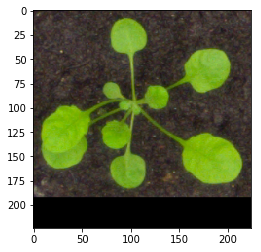

In [204]:
#ein2 ...3
plt.imshow(images[157])

In [216]:
print((model.predict(np.expand_dims(images[157],axis=0))*100))
np.argmax(model.predict(np.expand_dims(images[157],axis=0)))

[[4.8489851e-04 1.9810414e-03 3.8415188e-10 9.9952232e+01 4.5305036e-02]]


3

In [206]:
gc = grad_cam(model,np.expand_dims(images[157],axis=0),"max_pooling2d_3")

/home/dl-box/anaconda3/envs/keras/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


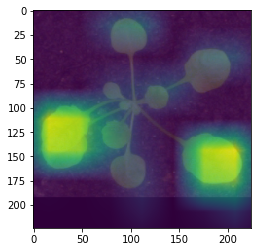

In [208]:
plt.imshow(images[157])
plt.imshow(gc,alpha=0.7)

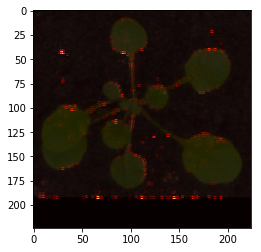

In [209]:
gb = guided_backprop(gmodel,np.expand_dims(images[157],axis=0),"dense_3",normalize="abs")
plt.imshow(images[157])
plt.imshow(gb,cmap="hot",alpha=0.8)

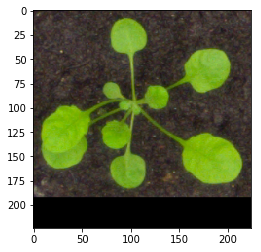

In [210]:
plt.imshow(images[157])

In [217]:
gmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        36928     
__________